# Group Project Notes

File to save notes on group project

Not necessarily necessary for the project, but helpful visualation elements

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy import interpolate

[1.16023502e+04 1.11387258e+01 2.72384294e-01 1.16023555e+04
 1.09225739e+01]


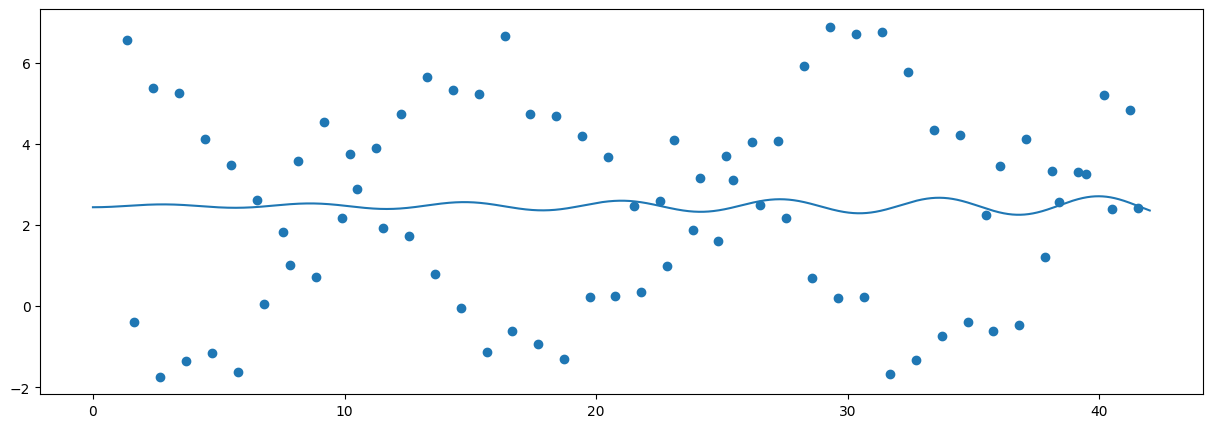

Help on class LinearNDInterpolator in module scipy.interpolate.interpnd:

class LinearNDInterpolator(NDInterpolatorBase)
 |  LinearNDInterpolator(points, values, fill_value=nan, rescale=False)
 |  
 |  LinearNDInterpolator(points, values, fill_value=np.nan, rescale=False)
 |  
 |  Piecewise linear interpolator in N > 1 dimensions.
 |  
 |  .. versionadded:: 0.9
 |  
 |  Methods
 |  -------
 |  __call__
 |  
 |  Parameters
 |  ----------
 |  points : ndarray of floats, shape (npoints, ndims); or Delaunay
 |      2-D array of data point coordinates, or a precomputed Delaunay triangulation.
 |  values : ndarray of float or complex, shape (npoints, ...), optional
 |      N-D array of data values at `points`.  The length of `values` along the
 |      first axis must be equal to the length of `points`. Unlike some
 |      interpolators, the interpolation axis cannot be changed.
 |  fill_value : float, optional
 |      Value used to fill in for requested points outside of the
 |      convex h

In [131]:
day, time0, value = np.loadtxt('ASTR19_F23_group_project_data.txt', dtype=
               [('day', 'i'), ('time', 'U5'), ('value', float)], skiprows=3, unpack=True)

time0 = np.char.split(time0, ':')
time1 = np.array([int(hour) + int(min)/60 for hour, min in time0])

time = np.array([int(hour)/24 + int(min)/60/24 for hour, min in time0])

time2 = np.array([day[i] + time[i] for i in range(len(day))])

#--- Linear interpolation ---
#create a function that, for any value of mass, computes the radius by linear interpolation
#this create a function with the name "rad_interpol" that will take 1 argument(mass) and return 1 value(radius)
rad_interpol = interpolate.interp1d(time2, value, kind='linear', fill_value='extrapolate')

def rad_model(time, a, b, c, d, e):
    return a * np.cos(b*time) + c + d * np.cos(e*time)

#perform the fit
params, params_cov = optimize.curve_fit(rad_model, time2, value, p0=[1,1, 1, 1,1])

param_err = np.sqrt(np.diag(params_cov)) #extract the diagonal, and apply the square root

#use fitted parameters to define the fitted function
def rad_fit(time, params):
    return rad_model(time, params[0], params[1], params[2], params[3], params[4])

print(param_err)

test_times = np.linspace(0, 42, 10000)

radii_fit = rad_fit(test_times, params)
fig = plt.figure(figsize=(15,5))
plt.scatter(time2, value)
plt.plot(test_times, radii_fit)
plt.show()

help(interpolate.LinearNDInterpolator)